### here are many cities of china

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re
#导入包

In [3]:
l =  "color and colour"

In [4]:
pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [5]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
            if line.startswith("//"):continue
            if line.strip()=="": continue
            # find city
            city = re.findall("name:'(\w+)'",line)[0]
            x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
            print(x_y)
            x_y = tuple(map(float,x_y))
            city_location[city] = x_y;
    return city_location

In [9]:
city_info = get_city_info(coordination_source)

('103.73', '36.03')
('98.17', '39.47')
('101.74', '36.56')
('104.06', '30.67')
('114.48', '38.03')
('102.73', '25.04')
('106.71', '26.57')
('114.31', '30.52')
('113.65', '34.76')
('117', '36.65')
('118.78', '32.04')
('117.27', '31.86')
('120.19', '30.26')
('115.89', '28.68')
('119.3', '26.08')
('113.23', '23.16')
('113', '28.21')
('123.38', '41.8')
('125.35', '43.88')
('126.63', '45.75')
('112.53', '37.87')
('108.95', '34.27')
('116.46', '39.92')
('121.48', '31.22')
('106.54', '29.59')
('117.2', '39.13')
('111.65', '40.82')
('108.33', '22.84')
('106.27', '38.47')
('87.68', '43.77')
('114.17', '22.28')
('113.54', '22.19')


In [10]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

### compute distance between city

In [11]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [12]:
#写一个判断两个城市的距离
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2]);

In [13]:
get_city_distance("杭州","上海")

153.5185697155768

#  draw the graph

In [14]:
import networkx as nx

In [15]:
import matplotlib.pyplot as plt
#导入字体库，并设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

In [17]:
city_graph = nx.Graph()

city_graph.add_nodes_from(list(city_info.keys()))

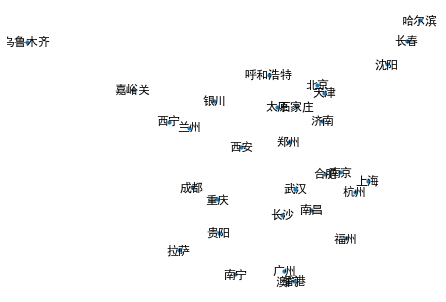

In [18]:
nx.draw(city_graph,city_info,with_labels=True,node_size=10)

In [19]:
threshold = 700 #define the threshold

In [20]:
from collections import defaultdict

In [21]:
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1==c2:continue
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection
cities_connection = build_connection(city_info)

In [22]:
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [23]:
print(type(cities_connection))
cities_connection_graph = nx.Graph(cities_connection)
print(cities_connection_graph)

<class 'collections.defaultdict'>



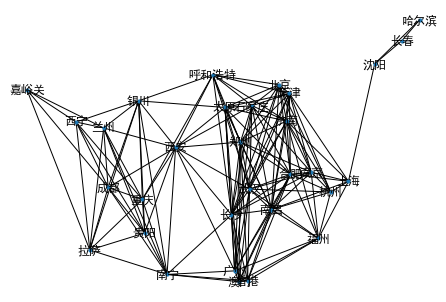

In [24]:
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

# BFS

In [25]:
def bfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        successors = graph[froniter]
        for city in successors:
            if city in path: continue #check up
            new_path = path + [city]
            print(new_path)
            pathes.append(new_path)
            if city == destination:
                return new_path
        visited.add(froniter)

In [26]:
bfs(cities_connection,"上海","香港")

['上海', '济南']
['上海', '南京']
['上海', '合肥']
['上海', '杭州']
['上海', '南昌']
['上海', '福州']
['上海', '沈阳']
['上海', '天津']
['上海', '济南', '石家庄']
['上海', '济南', '武汉']
['上海', '济南', '郑州']
['上海', '济南', '南京']
['上海', '济南', '合肥']
['上海', '济南', '杭州']
['上海', '济南', '南昌']
['上海', '济南', '福州']
['上海', '济南', '长沙']
['上海', '济南', '太原']
['上海', '济南', '北京']
['上海', '济南', '天津']
['上海', '济南', '呼和浩特']
['上海', '南京', '石家庄']
['上海', '南京', '武汉']
['上海', '南京', '郑州']
['上海', '南京', '济南']
['上海', '南京', '合肥']
['上海', '南京', '杭州']
['上海', '南京', '南昌']
['上海', '南京', '福州']
['上海', '南京', '长沙']
['上海', '南京', '北京']
['上海', '南京', '天津']
['上海', '合肥', '石家庄']
['上海', '合肥', '武汉']
['上海', '合肥', '郑州']
['上海', '合肥', '济南']
['上海', '合肥', '南京']
['上海', '合肥', '杭州']
['上海', '合肥', '南昌']
['上海', '合肥', '福州']
['上海', '合肥', '广州']
['上海', '合肥', '长沙']
['上海', '合肥', '太原']
['上海', '合肥', '北京']
['上海', '合肥', '天津']
['上海', '合肥', '香港']


['上海', '合肥', '香港']

In [27]:
bfs(cities_connection,"拉萨","西安")

['拉萨', '兰州']
['拉萨', '嘉峪关']
['拉萨', '西宁']
['拉萨', '成都']
['拉萨', '贵阳']
['拉萨', '重庆']
['拉萨', '南宁']
['拉萨', '银川']
['拉萨', '兰州', '嘉峪关']
['拉萨', '兰州', '西宁']
['拉萨', '兰州', '成都']
['拉萨', '兰州', '贵阳']
['拉萨', '兰州', '西安']


['拉萨', '兰州', '西安']

In [28]:
def dfs(graph,start,destination):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited:continue
        successors = graph[froniter]
        for city in successors:
            if city in path: continue #check up
            new_path = path + [city]
            #print(path)
            pathes = [new_path]+pathes
            #print(pathes) Keep adding small paths in, and the longer the path is in front
            if city == destination:
                print(pathes)
                return new_path
        visited.add(froniter)

In [29]:
dfs(cities_connection,"拉萨","北京")

[['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '西安'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '太原'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '广州'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '南昌'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '合肥'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '南京'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '济南'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '郑州'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '武汉'], ['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '石家庄'], ['拉萨', '银川', '南宁', '澳门', '香港', '广州'], ['拉萨', '银川', '南宁', '澳门', '香港', '福州'], ['拉萨', '银川', '南宁', '澳门', '香港', '南昌'], ['拉萨', '银川', '南宁', '澳门', '香港', '合肥'], ['拉萨', '银川', '南宁', '澳门', '香港', '郑州'], ['拉萨', '银川', '南宁', '澳门', '香港', '武汉'], ['拉萨', '银川', '南宁', '澳门', '太原'], ['拉萨', '银川', '南宁', '澳门', '长沙'], ['拉萨', '银川', '南宁', '澳门', '广州'], ['拉萨', '银川', '南宁', '澳门', '福州'], ['拉萨', '银川', '南宁', '澳门', '南昌'], ['拉萨', '银川', '南宁', '澳门', '合肥'], ['拉萨', '银川', '南宁', '澳门', '郑州'], ['拉萨', '银川', '南宁', '澳门', '武汉'], ['拉萨', '银川', '南宁', '香港'], ['拉萨

['拉萨', '银川', '南宁', '澳门', '香港', '长沙', '北京']

# AI the less distance

In [30]:
def bfs_2(graph,start,destination,search_strategy):
        pathes = [[start]]
        while pathes:
            path = pathes.pop(0)
            froniter = path[-1]
            successors = graph[froniter]
            for city in successors:
                if city in path: continue
                new_path = path+[city]
                pathes.append(new_path)

            pathes = search_strategy(pathes)
            # visit add
            if pathes and pathes[0][-1] == destination:# 这条路径经过重排序之后是最短的，
                print(pathes)
                print("--------------------------------------")
                return pathes[0]

In [31]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [32]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [33]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [34]:
bfs_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

[['北京', '天津', '上海'], ['北京', '石家庄', '呼和浩特', '太原'], ['北京', '天津', '石家庄', '呼和浩特'], ['北京', '郑州', '呼和浩特'], ['北京', '郑州', '太原', '呼和浩特'], ['北京', '济南', '郑州', '太原'], ['北京', '天津', '郑州', '武汉'], ['北京', '天津', '石家庄', '武汉'], ['北京', '济南', '天津', '郑州'], ['北京', '合肥', '武汉'], ['北京', '南昌', '武汉'], ['北京', '合肥', '杭州'], ['北京', '济南', '上海'], ['北京', '石家庄', '郑州', '呼和浩特'], ['北京', '石家庄', '郑州', '太原', '呼和浩特'], ['北京', '济南', '合肥', '武汉'], ['北京', '济南', '合肥', '杭州'], ['北京', '天津', '石家庄', '郑州', '太原'], ['北京', '石家庄', '武汉', '长沙'], ['北京', '济南', '郑州', '武汉'], ['北京', '合肥', '南京', '杭州'], ['北京', '济南', '长沙'], ['北京', '济南', '石家庄', '天津'], ['北京', '石家庄', '济南', '合肥'], ['北京', '天津', '太原', '呼和浩特'], ['北京', '济南', '合肥', '南京', '杭州'], ['北京', '济南', '武汉', '长沙'], ['北京', '郑州', '南昌'], ['北京', '天津', '石家庄', '太原', '呼和浩特'], ['北京', '南昌', '合肥'], ['北京', '天津', '济南', '郑州', '石家庄'], ['北京', '天津', '石家庄', '郑州', '武汉'], ['北京', '郑州', '济南'], ['北京', '郑州', '武汉', '长沙'], ['北京', '石家庄', '武汉', '南昌'], ['北京', '济南', '南昌', '武汉'], ['北京', '济南', '天津', '石家庄', '郑州'], ['北京', '济南', '福州'], ['北京'

['北京', '天津', '上海']

In [35]:
bfs(cities_connection,"北京","上海")

['北京', '石家庄']
['北京', '武汉']
['北京', '郑州']
['北京', '济南']
['北京', '南京']
['北京', '合肥']
['北京', '杭州']
['北京', '南昌']
['北京', '长沙']
['北京', '太原']
['北京', '天津']
['北京', '呼和浩特']
['北京', '石家庄', '武汉']
['北京', '石家庄', '郑州']
['北京', '石家庄', '济南']
['北京', '石家庄', '南京']
['北京', '石家庄', '合肥']
['北京', '石家庄', '南昌']
['北京', '石家庄', '广州']
['北京', '石家庄', '长沙']
['北京', '石家庄', '太原']
['北京', '石家庄', '西安']
['北京', '石家庄', '天津']
['北京', '石家庄', '呼和浩特']
['北京', '武汉', '石家庄']
['北京', '武汉', '郑州']
['北京', '武汉', '济南']
['北京', '武汉', '南京']
['北京', '武汉', '合肥']
['北京', '武汉', '杭州']
['北京', '武汉', '南昌']
['北京', '武汉', '福州']
['北京', '武汉', '广州']
['北京', '武汉', '长沙']
['北京', '武汉', '太原']
['北京', '武汉', '西安']
['北京', '武汉', '天津']
['北京', '武汉', '呼和浩特']
['北京', '武汉', '香港']
['北京', '武汉', '澳门']
['北京', '郑州', '石家庄']
['北京', '郑州', '武汉']
['北京', '郑州', '济南']
['北京', '郑州', '南京']
['北京', '郑州', '合肥']
['北京', '郑州', '南昌']
['北京', '郑州', '广州']
['北京', '郑州', '长沙']
['北京', '郑州', '太原']
['北京', '郑州', '西安']
['北京', '郑州', '天津']
['北京', '郑州', '呼和浩特']
['北京', '郑州', '香港']
['北京', '郑州', '澳门']
['北京', '济南', '石家庄']
['北

['北京', '济南', '上海']

In [36]:
get_distance_of_path(["北京","济南","上海"])

752.66259009181

In [37]:
get_distance_of_path(["北京","天津","上海"])

732.5085345714293

### BFS是没有重排序的，优化就是重排序

In [38]:
for i,j in enumerate([4,5,6,7]):
    print(i,j)

0 4
1 5
2 6
3 7


In [43]:
def bfs_3(graph,start,destination,search_strategy):
    #这是个有问题的
        pathes = [[start]]
        visited = set()
        while pathes:
            print(pathes[0])
            path = pathes.pop(0)
            froniter = path[-1]
            if froniter in visited:continue
            successors = graph[froniter]
            for city in successors:
                if city in path: continue
                new_path = path+[city]
                pathes.append(new_path)

            pathes = search_strategy(pathes)
            # visit add
            if pathes and pathes[0][-1] == destination:# 这条路径经过重排序之后是最短的，有可能重排序前的第一个最后一个是目标地址，但是visited就添加了它，导致后面所有数据跳过
#                 print(pathes)
#                 print("--------------------------------------")
                return pathes[0]
            visited.add(froniter)

In [44]:
bfs_3(cities_connection,"上海","香港",search_strategy=sort_by_distance)#寻找不到路径

['上海']
['上海', '杭州']
['上海', '南京']
['上海', '杭州', '南京']
['上海', '福州']
['上海', '杭州', '福州']
['上海', '合肥']
['上海', '南京', '合肥']
['上海', '南京', '杭州']
['上海', '杭州', '合肥']
['上海', '济南']
['上海', '南京', '济南']
['上海', '福州', '杭州']
['上海', '南京', '福州']
['上海', '南昌']
['上海', '合肥', '南京']
['上海', '杭州', '南昌']
['上海', '天津']
['上海', '杭州', '济南']
['上海', '沈阳']
['上海', '南京', '南昌']
['上海', '合肥', '南昌']
['上海', '福州', '南京']
['上海', '济南', '天津']
['上海', '南京', '天津']
['上海', '合肥', '济南']
['上海', '杭州', '天津']
['上海', '天津', '北京']
['上海', '济南', '北京']
['上海', '福州', '合肥']
['上海', '天津', '济南']
['上海', '福州', '南昌']
['上海', '南京', '北京']
['上海', '合肥', '武汉']
['上海', '合肥', '杭州']
['上海', '南京', '武汉']
['上海', '杭州', '武汉']
['上海', '杭州', '北京']
['上海', '济南', '合肥']
['上海', '南昌', '武汉']
['上海', '合肥', '天津']
['上海', '合肥', '福州']
['上海', '南昌', '合肥']
['上海', '济南', '石家庄']
['上海', '南京', '石家庄']
['上海', '合肥', '北京']
['上海', '济南', '南京']
['上海', '南京', '郑州']
['上海', '合肥', '郑州']
['上海', '合肥', '石家庄']
['上海', '天津', '北京', '济南']
['上海', '沈阳', '长春']
['上海', '天津', '石家庄']
['上海', '南昌', '长沙']
['上海', '济南', '郑州']
['上海'

# Part 2

In [45]:
import sklearn

In [46]:
from sklearn.datasets import load_boston

In [47]:
import random

In [50]:
dataset = load_boston()


In [51]:
x,y = dataset['data'],dataset['target']

In [52]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [53]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [54]:
x.shape

(506, 13)

In [55]:
y.shape

(506,)

In [56]:
x[1].shape

(13,)

In [57]:
x[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [58]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [60]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [61]:
X_rm = x[:,5]

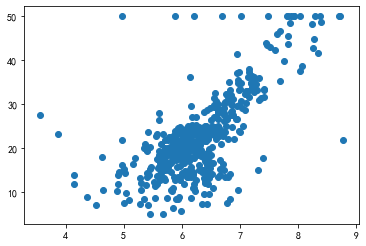

In [62]:
# plot the RM with respect to y
plt.scatter(X_rm,y)

# gradient descent


In [63]:
#define target function

In [64]:
def price(rm,k,b):
    return k*rm+b

In [67]:
def loss(y,y_hat):
        return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

# 补梯度公式

In [68]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

In [83]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100
# learning_rate looks like the length of step
learning_rate = 1e-3

iteration_num = 2000 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 285319.57217149396, parameters k is -66.73479606286645 and b is -89.51646899933365
Iteration 1, the loss is 240479.6842937369, parameters k is -59.9800906306246 and b is -88.45356286034757
Iteration 2, the loss is 202688.29692637632, parameters k is -53.77897736752455 and b is -87.47768424171126
Iteration 3, the loss is 170837.43761569535, parameters k is -48.08608684737786 and b is -86.5817008396185
Iteration 4, the loss is 143993.29903095338, parameters k is -42.859767877261056 and b is -85.75906487538262
Iteration 5, the loss is 121368.8614876666, parameters k is -38.06178277118836 and b is -85.00376519091293
Iteration 6, the loss is 102300.81900891942, parameters k is -33.65702759750925 and b is -84.31028327018744
Iteration 7, the loss is 86230.1324401844, parameters k is -29.613275353319253 and b is -83.67355286496813
Iteration 8, the loss is 72685.63947149886, parameters k is -25.900940186909683 and b is -83.0889229293748
Iteration 9, the loss is 61270.24

Iteration 123, the loss is 65.09201722896421, parameters k is 15.6655441253735 and b is -76.43594313581526
Iteration 124, the loss is 65.09095080294531, parameters k is 15.66556901064183 and b is -76.43491007150921
Iteration 125, the loss is 65.08988958699118, parameters k is 15.665578920757088 and b is -76.43387938612139
Iteration 126, the loss is 65.08883276992952, parameters k is 15.665575083313053 and b is -76.43285088666725
Iteration 127, the loss is 65.08777966809804, parameters k is 15.665558625296535 and b is -76.43182439597815
Iteration 128, the loss is 65.08672970530083, parameters k is 15.66553058133258 and b is -76.4307997514052
Iteration 129, the loss is 65.0856823959151, parameters k is 15.665491901253946 and b is -76.42977680362928
Iteration 130, the loss is 65.0846373306543, parameters k is 15.665443457050213 and b is -76.4287554155686
Iteration 131, the loss is 65.08359416456821, parameters k is 15.665386049247397 and b is -76.42773546137583
Iteration 132, the loss is 

Iteration 225, the loss is 64.98663705772545, parameters k is 15.651689080181084 and b is -76.33327506930323
Iteration 226, the loss is 64.98560851802392, parameters k is 15.651531610725906 and b is -76.33227319334328
Iteration 227, the loss is 64.98458002778911, parameters k is 15.651374142616822 and b is -76.33127134185936
Iteration 228, the loss is 64.98355158701834, parameters k is 15.65121667605382 and b is -76.33026951481942
Iteration 229, the loss is 64.9825231957095, parameters k is 15.651059211220492 and b is -76.329267712194
Iteration 230, the loss is 64.98149485386004, parameters k is 15.65090174828537 and b is -76.32826593395602
Iteration 231, the loss is 64.98046656146758, parameters k is 15.650744287403173 and b is -76.32726418008056
Iteration 232, the loss is 64.97943831852979, parameters k is 15.650586828715928 and b is -76.3262624505447
Iteration 233, the loss is 64.97841012504415, parameters k is 15.650429372354019 and b is -76.32526074532736
Iteration 234, the loss i

Iteration 361, the loss is 64.84720878659346, parameters k is 15.630304277683514 and b is -76.197241447753
Iteration 362, the loss is 64.84618695253857, parameters k is 15.630147292693788 and b is -76.19624284770588
Iteration 363, the loss is 64.84516516762766, parameters k is 15.629990311479094 and b is -76.19524427167231
Iteration 364, the loss is 64.84414343185838, parameters k is 15.629833334039343 and b is -76.19424571965173
Iteration 365, the loss is 64.84312174522839, parameters k is 15.629676360374445 and b is -76.19324719164356
Iteration 366, the loss is 64.84210010773519, parameters k is 15.629519390484312 and b is -76.19224868764724
Iteration 367, the loss is 64.84107851937655, parameters k is 15.629362424368853 and b is -76.19125020766216
Iteration 368, the loss is 64.84005698015002, parameters k is 15.629205462027981 and b is -76.19025175168777
Iteration 369, the loss is 64.83903549005328, parameters k is 15.629048503461604 and b is -76.18925331972346
Iteration 370, the lo

Iteration 467, the loss is 64.73916740750491, parameters k is 15.61368485941854 and b is -76.09152336689618
Iteration 468, the loss is 64.73815076957857, parameters k is 15.61352827407946 and b is -76.09052730907572
Iteration 469, the loss is 64.73713418054632, parameters k is 15.613371692505826 and b is -76.08953127520769
Iteration 470, the loss is 64.73611764040577, parameters k is 15.613215114697544 and b is -76.08853526529151
Iteration 471, the loss is 64.73510114915459, parameters k is 15.613058540654524 and b is -76.0875392793266
Iteration 472, the loss is 64.73408470679038, parameters k is 15.612901970376676 and b is -76.0865433173124
Iteration 473, the loss is 64.73306831331081, parameters k is 15.612745403863908 and b is -76.08554737924833
Iteration 474, the loss is 64.73205196871355, parameters k is 15.61258884111613 and b is -76.08455146513379
Iteration 475, the loss is 64.73103567299631, parameters k is 15.612432282133252 and b is -76.08355557496822
Iteration 476, the loss 

Iteration 569, the loss is 64.63572178903435, parameters k is 15.59773253509199 and b is -75.99004874932628
Iteration 570, the loss is 64.6347101262086, parameters k is 15.597576333362067 and b is -75.98905513168891
Iteration 571, the loss is 64.63369851203765, parameters k is 15.59742013538836 and b is -75.9880615379453
Iteration 572, the loss is 64.63268694651917, parameters k is 15.597263941170782 and b is -75.98706796809486
Iteration 573, the loss is 64.63167542965074, parameters k is 15.597107750709242 and b is -75.98607442213702
Iteration 574, the loss is 64.63066396143016, parameters k is 15.596951564003648 and b is -75.98508090007121
Iteration 575, the loss is 64.62965254185501, parameters k is 15.596795381053912 and b is -75.98408740189684
Iteration 576, the loss is 64.62864117092289, parameters k is 15.596639201859944 and b is -75.98309392761335
Iteration 577, the loss is 64.62762984863147, parameters k is 15.596483026421652 and b is -75.98210047722016
Iteration 578, the loss

Iteration 670, the loss is 64.53378916079862, parameters k is 15.58197511422827 and b is -75.88981393568402
Iteration 671, the loss is 64.5327824003079, parameters k is 15.581819291420612 and b is -75.8888227284159
Iteration 672, the loss is 64.53177568823621, parameters k is 15.58166347236006 and b is -75.88783154498357
Iteration 673, the loss is 64.53076902458119, parameters k is 15.581507657046524 and b is -75.88684038538645
Iteration 674, the loss is 64.52976240934052, parameters k is 15.581351845479915 and b is -75.88584924962397
Iteration 675, the loss is 64.52875584251191, parameters k is 15.581196037660142 and b is -75.88485813769556
Iteration 676, the loss is 64.52774932409304, parameters k is 15.581040233587114 and b is -75.88386704960064
Iteration 677, the loss is 64.52674285408143, parameters k is 15.580884433260742 and b is -75.88287598533864
Iteration 678, the loss is 64.5257364324749, parameters k is 15.580728636680936 and b is -75.88188494490899
Iteration 679, the loss 

Iteration 776, the loss is 64.42734155190075, parameters k is 15.56547873189045 and b is -75.78487850090033
Iteration 777, the loss is 64.42633991088799, parameters k is 15.565323305775031 and b is -75.78388981703837
Iteration 778, the loss is 64.42533831804798, parameters k is 15.56516788339718 and b is -75.78290115695151
Iteration 779, the loss is 64.42433677337849, parameters k is 15.565012464756807 and b is -75.78191252063918
Iteration 780, the loss is 64.42333527687718, parameters k is 15.56485704985382 and b is -75.78092390810082
Iteration 781, the loss is 64.42233382854172, parameters k is 15.564701638688131 and b is -75.77993531933585
Iteration 782, the loss is 64.42133242836978, parameters k is 15.56454623125965 and b is -75.77894675434369
Iteration 783, the loss is 64.42033107635908, parameters k is 15.564390827568285 and b is -75.77795821312378
Iteration 784, the loss is 64.41932977250723, parameters k is 15.56423542761395 and b is -75.77696969567555
Iteration 785, the loss 

Iteration 887, the loss is 64.31645298117232, parameters k is 15.548249231002094 and b is -75.67527961250163
Iteration 888, the loss is 64.31545667322057, parameters k is 15.548094219208384 and b is -75.67429356418894
Iteration 889, the loss is 64.31446041318515, parameters k is 15.547939211142278 and b is -75.673307539588
Iteration 890, the loss is 64.31346420106368, parameters k is 15.547784206803685 and b is -75.6723215386982
Iteration 891, the loss is 64.31246803685394, parameters k is 15.547629206192518 and b is -75.67133556151899
Iteration 892, the loss is 64.3114719205536, parameters k is 15.547474209308685 and b is -75.67034960804979
Iteration 893, the loss is 64.31047585216034, parameters k is 15.547319216152097 and b is -75.66936367829004
Iteration 894, the loss is 64.30947983167184, parameters k is 15.547164226722664 and b is -75.66837777223917
Iteration 895, the loss is 64.30848385908584, parameters k is 15.547009241020298 and b is -75.6673918898966
Iteration 896, the loss 

Iteration 986, the loss is 64.21805057492638, parameters k is 15.532921131978707 and b is -75.57777576574979
Iteration 987, the loss is 64.21705899952762, parameters k is 15.532766488783263 and b is -75.57679206213419
Iteration 988, the loss is 64.2160674718175, parameters k is 15.53261184930656 and b is -75.57580838217392
Iteration 989, the loss is 64.21507599179382, parameters k is 15.532457213548508 and b is -75.57482472586842
Iteration 990, the loss is 64.21408455945426, parameters k is 15.532302581509017 and b is -75.57384109321714
Iteration 991, the loss is 64.21309317479654, parameters k is 15.532147953187996 and b is -75.5728574842195
Iteration 992, the loss is 64.21210183781828, parameters k is 15.531993328585358 and b is -75.57187389887491
Iteration 993, the loss is 64.21111054851733, parameters k is 15.531838707701013 and b is -75.57089033718283
Iteration 994, the loss is 64.21011930689127, parameters k is 15.53168409053487 and b is -75.56990679914269
Iteration 995, the loss

Iteration 1100, the loss is 64.10531759162086, parameters k is 15.515315738612804 and b is -75.46578578094244
Iteration 1101, the loss is 64.10433143798805, parameters k is 15.51516151877824 and b is -75.46480477037535
Iteration 1102, the loss is 64.10334533178312, parameters k is 15.515007302652236 and b is -75.46382378339884
Iteration 1103, the loss is 64.10235927300388, parameters k is 15.514853090234702 and b is -75.46284282001234
Iteration 1104, the loss is 64.10137326164809, parameters k is 15.514698881525549 and b is -75.4618618802153
Iteration 1105, the loss is 64.10038729771333, parameters k is 15.514544676524686 and b is -75.46088096400713
Iteration 1106, the loss is 64.09940138119747, parameters k is 15.514390475232027 and b is -75.45990007138728
Iteration 1107, the loss is 64.09841551209801, parameters k is 15.51423627764748 and b is -75.45891920235518
Iteration 1108, the loss is 64.09742969041294, parameters k is 15.514082083770958 and b is -75.45793835691025
Iteration 110

Iteration 1188, the loss is 64.01871737606729, parameters k is 15.501758579754751 and b is -75.37954709357041
Iteration 1189, the loss is 64.01773538737439, parameters k is 15.501604685932255 and b is -75.37856815680455
Iteration 1190, the loss is 64.01675344590907, parameters k is 15.501450795810479 and b is -75.37758924357941
Iteration 1191, the loss is 64.01577155166909, parameters k is 15.501296909389334 and b is -75.3766103538944
Iteration 1192, the loss is 64.01478970465226, parameters k is 15.50114302666873 and b is -75.37563148774899
Iteration 1193, the loss is 64.01380790485624, parameters k is 15.500989147648578 and b is -75.37465264514259
Iteration 1194, the loss is 64.01282615227878, parameters k is 15.500835272328791 and b is -75.37367382607464
Iteration 1195, the loss is 64.01184444691764, parameters k is 15.500681400709277 and b is -75.37269503054458
Iteration 1196, the loss is 64.01086278877045, parameters k is 15.500527532789949 and b is -75.37171625855183
Iteration 11

Iteration 1305, the loss is 63.904144595722634, parameters k is 15.48377809247218 and b is -75.2651710920944
Iteration 1306, the loss is 63.90316811727858, parameters k is 15.483624631030532 and b is -75.26419490575414
Iteration 1307, the loss is 63.90219168579723, parameters k is 15.483471173279206 and b is -75.26321874288845
Iteration 1308, the loss is 63.90121530127619, parameters k is 15.483317719218112 and b is -75.26224260349677
Iteration 1309, the loss is 63.90023896371323, parameters k is 15.483164268847164 and b is -75.26126648757854
Iteration 1310, the loss is 63.899262673106165, parameters k is 15.483010822166271 and b is -75.26029039513318
Iteration 1311, the loss is 63.89828642945268, parameters k is 15.482857379175345 and b is -75.25931432616015
Iteration 1312, the loss is 63.897310232750556, parameters k is 15.482703939874296 and b is -75.25833828065886
Iteration 1313, the loss is 63.896334082997534, parameters k is 15.482550504263038 and b is -75.25736225862876
Iteratio

Iteration 1411, the loss is 63.800898792506395, parameters k is 15.467531699190008 and b is -75.16182586719485
Iteration 1412, the loss is 63.79992727955306, parameters k is 15.467378628429056 and b is -75.1608521660206
Iteration 1413, the loss is 63.798955813323595, parameters k is 15.467225561349032 and b is -75.15987848826117
Iteration 1414, the loss is 63.797984393815554, parameters k is 15.467072497949847 and b is -75.15890483391598
Iteration 1415, the loss is 63.79701302102693, parameters k is 15.466919438231411 and b is -75.15793120298449
Iteration 1416, the loss is 63.79604169495543, parameters k is 15.466766382193637 and b is -75.15695759546611
Iteration 1417, the loss is 63.795070415598765, parameters k is 15.466613329836436 and b is -75.1559840113603
Iteration 1418, the loss is 63.794099182954625, parameters k is 15.466460281159721 and b is -75.1550104506665
Iteration 1419, the loss is 63.79312799702083, parameters k is 15.4663072361634 and b is -75.15403691338412
Iteration 

Iteration 1536, the loss is 63.67982106997924, parameters k is 15.448426353151772 and b is -75.04029450642987
Iteration 1537, the loss is 63.67885538012265, parameters k is 15.448273741821401 and b is -75.03932372774777
Iteration 1538, the loss is 63.67788973670988, parameters k is 15.44812113416091 and b is -75.03835297241021
Iteration 1539, the loss is 63.676924139738595, parameters k is 15.44796853017021 and b is -75.03738224041662
Iteration 1540, the loss is 63.675958589206665, parameters k is 15.447815929849211 and b is -75.03641153176643
Iteration 1541, the loss is 63.67499308511177, parameters k is 15.447663333197829 and b is -75.0354408464591
Iteration 1542, the loss is 63.67402762745168, parameters k is 15.447510740215971 and b is -75.03447018449405
Iteration 1543, the loss is 63.67306221622419, parameters k is 15.447358150903552 and b is -75.03349954587074
Iteration 1544, the loss is 63.672096851427156, parameters k is 15.447205565260482 and b is -75.0325289305886
Iteration 1

Iteration 1663, the loss is 63.55754931123557, parameters k is 15.429074047499649 and b is -74.91719220641731
Iteration 1664, the loss is 63.5565895019016, parameters k is 15.428921901538553 and b is -74.91622438800408
Iteration 1665, the loss is 63.5556297387286, parameters k is 15.428769759236145 and b is -74.9152565928642
Iteration 1666, the loss is 63.55467002171436, parameters k is 15.428617620592338 and b is -74.9142888209971
Iteration 1667, the loss is 63.55371035085661, parameters k is 15.428465485607042 and b is -74.91332107240224
Iteration 1668, the loss is 63.55275072615312, parameters k is 15.42831335428017 and b is -74.91235334707905
Iteration 1669, the loss is 63.55179114760173, parameters k is 15.428161226611637 and b is -74.91138564502697
Iteration 1670, the loss is 63.55083161520017, parameters k is 15.42800910260135 and b is -74.91041796624543
Iteration 1671, the loss is 63.549872128946234, parameters k is 15.427856982249226 and b is -74.90945031073389
Iteration 1672,

Iteration 1805, the loss is 63.4217174676451, parameters k is 15.407505907084419 and b is -74.77999471998668
Iteration 1806, the loss is 63.42076419099078, parameters k is 15.407354279777277 and b is -74.77903020079246
Iteration 1807, the loss is 63.41981096018323, parameters k is 15.40720265611635 and b is -74.77806570479225
Iteration 1808, the loss is 63.41885777522023, parameters k is 15.407051036101553 and b is -74.7771012319855
Iteration 1809, the loss is 63.417904636099564, parameters k is 15.406899419732797 and b is -74.77613678237164
Iteration 1810, the loss is 63.416951542819106, parameters k is 15.406747807009994 and b is -74.77517235595012
Iteration 1811, the loss is 63.415998495376584, parameters k is 15.406596197933057 and b is -74.77420795272037
Iteration 1812, the loss is 63.4150454937698, parameters k is 15.406444592501897 and b is -74.77324357268186
Iteration 1813, the loss is 63.41409253799661, parameters k is 15.406292990716427 and b is -74.77227921583402
Iteration 1

Iteration 1883, the loss is 63.347499398859206, parameters k is 15.395689920047108 and b is -74.7048318320415
Iteration 1884, the loss is 63.34654969163941, parameters k is 15.39553857688168 and b is -74.70386912030627
Iteration 1885, the loss is 63.3456000300947, parameters k is 15.395387237355637 and b is -74.70290643172157
Iteration 1886, the loss is 63.344650414222826, parameters k is 15.395235901468888 and b is -74.70194376628687
Iteration 1887, the loss is 63.343700844021676, parameters k is 15.39508456922135 and b is -74.7009811240016
Iteration 1888, the loss is 63.34275131948907, parameters k is 15.39493324061293 and b is -74.70001850486521
Iteration 1889, the loss is 63.341801840622765, parameters k is 15.394781915643545 and b is -74.69905590887714
Iteration 1890, the loss is 63.34085240742057, parameters k is 15.394630594313107 and b is -74.69809333603683
Iteration 1891, the loss is 63.33990301988037, parameters k is 15.394479276621526 and b is -74.69713078634373
Iteration 18

Iteration 1977, the loss is 63.258426271924264, parameters k is 15.381479558516919 and b is -74.61443804538777
Iteration 1978, the loss is 63.25748084857612, parameters k is 15.381328557071273 and b is -74.61347750737238
Iteration 1979, the loss is 63.2565354706972, parameters k is 15.381177559256793 and b is -74.61251699245527
Iteration 1980, the loss is 63.25559013828507, parameters k is 15.381026565073391 and b is -74.61155650063587
Iteration 1981, the loss is 63.25464485133765, parameters k is 15.38087557452098 and b is -74.61059603191364
Iteration 1982, the loss is 63.253699609852795, parameters k is 15.380724587599474 and b is -74.60963558628802
Iteration 1983, the loss is 63.2527544138282, parameters k is 15.380573604308784 and b is -74.60867516375845
Iteration 1984, the loss is 63.2518092632618, parameters k is 15.380422624648824 and b is -74.60771476432438
Iteration 1985, the loss is 63.25086415815139, parameters k is 15.380271648619505 and b is -74.60675438798526
Iteration 19

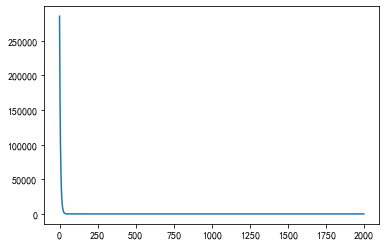

In [85]:
plt.plot(list(range(iteration_num)),losses)

In [74]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100
# learning_rate looks like the length of step
learning_rate = 1e-3

iteration_num = 10 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 1855.4480437909158, parameters k is -10.877029520322552 and b is 50.701653970230666
Iteration 1, the loss is 1585.0849189020198, parameters k is -10.352192078038744 and b is 50.782032582449744
Iteration 2, the loss is 1357.220194545316, parameters k is -9.870340725817853 and b is 50.85565361456929
Iteration 3, the loss is 1165.1734346745627, parameters k is -9.427952556401822 and b is 50.92307088546908
Iteration 4, the loss is 1003.3143186698057, parameters k is -9.021793380994692 and b is 50.98479282602293
Iteration 5, the loss is 866.89757091369, parameters k is -8.648894067455966 and b is 51.04128619885467
Iteration 6, the loss is 751.9238382246435, parameters k is -8.306528817687902 and b is 51.09297951324297
Iteration 7, the loss is 655.0224363346282, parameters k is -7.992195225290897 and b is 51.14026616015905
Iteration 8, the loss is 573.3525277584267, parameters k is -7.703595967585786 and b is 51.18350729037354
Iteration 9, the loss is 504.51983377527

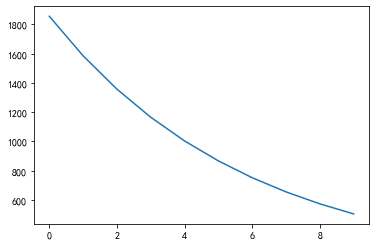

In [75]:
plt.plot(list(range(iteration_num)),losses)

# 和迭代次数和学习率有关

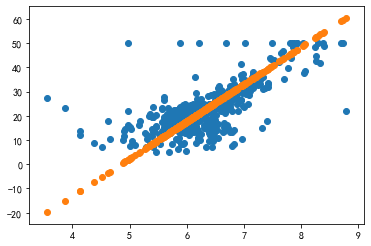

In [84]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)